<h1>ACTIVITY 2 - Accident Dates</h1>
<hr>

<h2>Analyst: Raeven Maranan</h2>

In [2]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
acci=pd.read_csv('datasets\\accident_data.csv')
acci["Accident Date"]=pd.to_datetime(acci["Accident Date"],errors='coerce')

In [4]:
acci

,Index,Accident_Severity,Accident Date,Latitude,Light_Conditions,District Area,Longitude,Number_of_Casualties,Number_of_Vehicles,Road_Surface_Conditions,Road_Type,Urban_or_Rural_Area,Weather_Conditions,Vehicle_Type
0,200701BS64157,Serious,2019-05-06,51.506187,Darkness - lights lit,Kensington and Chelsea,-0.209082,1,2,Dry,Single carriageway,Urban,Fine no high winds,Car
1,200701BS65737,Serious,2019-02-07,51.495029,Daylight,Kensington and Chelsea,-0.173647,1,2,Wet or damp,Single carriageway,Urban,Raining no high winds,Car
2,200701BS66127,Serious,NaT,51.517715,Darkness - lighting unknown,Kensington and Chelsea,-0.210215,1,3,Dry,NaN,Urban,NaN,Taxi/Private hire car
3,200701BS66128,Serious,NaT,51.495478,Daylight,Kensington and Chelsea,-0.202731,1,4,Dry,Single carriageway,Urban,Fine no high winds,Bus or coach (17 or more pass seats)
4,200701BS66837,Slight,2019-03-09,51.488576,Darkness - lights lit,Kensington and Chelsea,-0.192487,1,2,Dry,NaN,Urban,NaN,Other vehicle
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
660674,201091NM01760,Slight,NaT,57.374005,Daylight,Highland,-3.467828,2,1,Dry,Single carriageway,Rural,Fine no high winds,Car
660675,201091NM01881,Slight,NaT,57.232273,Darkness - no lighting,Highland,-3.809281,1,1,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660676,201091NM01935,Slight,NaT,57.585044,Daylight,Highland,-3.862727,1,3,Frost or ice,Single carriageway,Rural,Fine no high winds,Car
660677,201091NM01964,Serious,NaT,57.214898,Darkness - no lighting,Highland,-3.823997,1,2,Wet or damp,Single carriageway,Rural,Fine no high winds,Motorcycle over 500cc


In [5]:
acci.describe()

,Accident Date,Latitude,Longitude,Number_of_Casualties,Number_of_Vehicles
count,265007,660654.000000,660653.000000,660679.000000,660679.000000
mean,2020-11-18 04:53:34.375468544,52.553866,-1.431210,1.357040,1.831255
min,2019-01-01 00:00:00,49.914430,-7.516225,1.000000,1.000000
25%,2019-12-02 00:00:00,51.490690,-2.332291,1.000000,1.000000
50%,2020-11-05 00:00:00,52.315641,-1.411667,1.000000,2.000000
75%,2021-11-05 00:00:00,53.453452,-0.232869,1.000000,2.000000
max,2022-12-12 00:00:00,60.757544,1.762010,68.000000,32.000000
std,NaN,1.406922,1.383330,0.824847,0.715269


In [6]:
acci.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                       25
Light_Conditions                0
District Area                   0
Longitude                      26
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions       726
Road_Type                    4520
Urban_or_Rural_Area            15
Weather_Conditions          14128
Vehicle_Type                    0
dtype: int64

In [7]:
acci['Latitude']=acci['Latitude'].fillna(acci['Latitude'].mean())
acci['Longitude']=acci['Longitude'].fillna(acci['Longitude'].mean())
acci['Road_Surface_Conditions']=acci['Road_Surface_Conditions'].fillna(acci['Road_Surface_Conditions'].mode()[0])
acci['Road_Type']=acci['Road_Type'].fillna(acci['Road_Type'].mode()[0])
acci['Urban_or_Rural_Area']=acci['Urban_or_Rural_Area'].fillna(acci['Urban_or_Rural_Area'].mode()[0])
acci['Weather_Conditions']=acci['Weather_Conditions'].fillna(acci['Weather_Conditions'].mode()[0])

In [8]:
acci.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
dtype: int64

<h1>1)what are the basics statistics for  the casualtuies and vehicles?</h1>
<hr>

In [9]:
acci[['Number_of_Casualties','Number_of_Vehicles']].describe()

,Number_of_Casualties,Number_of_Vehicles
count,660679.000000,660679.000000
mean,1.357040,1.831255
std,0.824847,0.715269
min,1.000000,1.000000
25%,1.000000,1.000000
50%,1.000000,2.000000
75%,1.000000,2.000000
max,68.000000,32.000000


<h1>insights no.1</h1>
<p>most of the accidents involve very few casualties and vehicles, with few extreme cases</p>

<h1>2)whats the most common accident severity?</h1>
<hr>

In [10]:
acci['Accident_Severity'].mode()

0    Slight
Name: Accident_Severity, dtype: object

<h1>insights no.2</h1>
<p>this shows that slight is the most common accident severity</p>

<h1>3)what are the  max and min number of casualties recorded?</h1>
<hr>

In [11]:
acci['Number_of_Casualties'].max()


68

In [12]:
acci['Number_of_Casualties'].min()

1

<h1>insights no.3</h1>
<p>this shows that the maximum n0umber of casualties is 68 while the minimum is 1</p>

In [13]:
acci["Accident Date"]=acci["Accident Date"].astype('str')

In [14]:
acci["Accident Date"]=acci["Accident Date"].str.replace('/','-')

In [15]:
acci["Accident Date"]=pd.to_datetime(acci["Accident Date"],dayfirst=True,errors='coerce')

<h1>adjusting data types</h1>
<hr>

In [16]:
acci.dtypes

Index                              object
Accident_Severity                  object
Accident Date              datetime64[ns]
Latitude                          float64
Light_Conditions                   object
District Area                      object
Longitude                         float64
Number_of_Casualties                int64
Number_of_Vehicles                  int64
Road_Surface_Conditions            object
Road_Type                          object
Urban_or_Rural_Area                object
Weather_Conditions                 object
Vehicle_Type                       object
dtype: object

<h1>extracting date  information using pandas date time</h1>
<hr>

In [17]:
acci['year']=acci["Accident Date"].dt.year
acci['month']=acci["Accident Date"].dt.month
acci['day']=acci["Accident Date"].dt.day
acci['dayofweek']=acci["Accident Date"].dt.dayofweek

In [18]:
acci.isnull().sum()

Index                           0
Accident_Severity               0
Accident Date              395672
Latitude                        0
Light_Conditions                0
District Area                   0
Longitude                       0
Number_of_Casualties            0
Number_of_Vehicles              0
Road_Surface_Conditions         0
Road_Type                       0
Urban_or_Rural_Area             0
Weather_Conditions              0
Vehicle_Type                    0
year                       395672
month                      395672
day                        395672
dayofweek                  395672
dtype: int64

In [19]:
acci['Accident Date']=acci['Accident Date'].fillna(acci['Accident Date'].mean())
acci['year']=acci['year'].fillna(acci['year'].mean())
acci['month']=acci['month'].fillna(acci['month'].mean())
acci['dayofweek']=acci['dayofweek'].fillna(acci['dayofweek'].mean())
acci['day']=acci['day'].fillna(acci['day'].mean())

In [20]:
acci.isnull().sum()

Index                      0
Accident_Severity          0
Accident Date              0
Latitude                   0
Light_Conditions           0
District Area              0
Longitude                  0
Number_of_Casualties       0
Number_of_Vehicles         0
Road_Surface_Conditions    0
Road_Type                  0
Urban_or_Rural_Area        0
Weather_Conditions         0
Vehicle_Type               0
year                       0
month                      0
day                        0
dayofweek                  0
dtype: int64

<h1>univariate analysis on accidents that happen on 2019</h1>
<hr>

In [21]:
df_2019=acci[acci['year']==2019]

In [22]:
print(f"total nummber of accident on 2019 is{df_2019['Light_Conditions'].value_counts().sum()}")
df_2019['Light_Conditions'].value_counts()

total nummber of accident on 2019 is71867


Light_Conditions
Daylight                       52518
Darkness - lights lit          14124
Darkness - no lighting          4242
Darkness - lighting unknown      719
Darkness - lights unlit          264
Name: count, dtype: int64

In [23]:
monthly_acc=acci.groupby(['year','month'])['Index'].count()

In [24]:
monthly_acc.unstack()

month,1.000000,2.000000,3.000000,4.000000,5.000000,6.000000,6.708374,7.000000,8.000000,9.000000,10.000000,11.000000,12.000000
year,,,,,,,,,,,,,
2019.000000,5318.0,6173.0,5903.0,5178.0,6265.0,5840.0,NaN,6080.0,5995.0,5949.0,6229.0,6241.0,6696.0
2020.000000,5146.0,6022.0,5579.0,5457.0,5837.0,5770.0,NaN,6215.0,5394.0,5869.0,6275.0,5872.0,6727.0
2020.407216,NaN,NaN,NaN,NaN,NaN,NaN,395672.0,NaN,NaN,NaN,NaN,NaN,NaN
2021.000000,4545.0,5038.0,5200.0,4943.0,5265.0,5628.0,NaN,5655.0,5209.0,5649.0,5999.0,6352.0,6689.0
2022.000000,3243.0,5031.0,5142.0,4209.0,4356.0,4958.0,NaN,4989.0,4508.0,5091.0,5459.0,5775.0,4044.0


<h1>focus on one variable at a time</h1>
<hr>

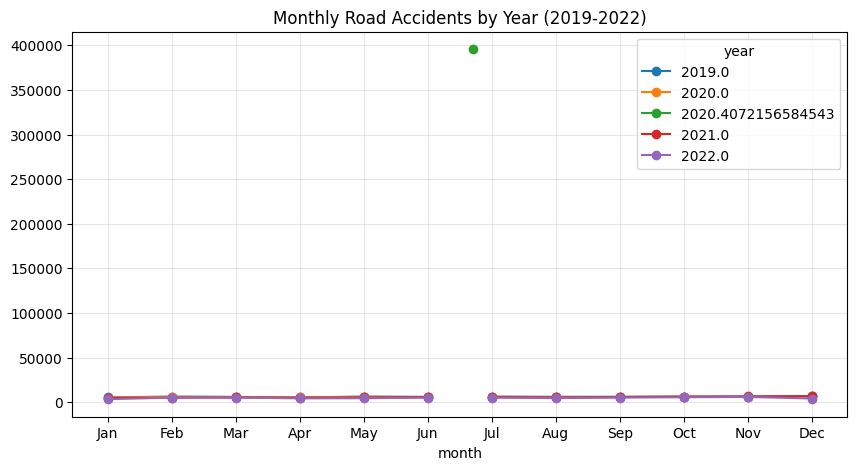

In [25]:
# 1. group by year FIRST then Month (critical order )
monthly_data=acci.groupby (['year','month'])['Index'].count()
# 2. unstack year to create seperate lines for each year
monthly_data=monthly_data.unstack(level=0)
#3. plot with clean formatting(only 4 lines)
monthly_data.plot(
    marker='o', 
    figsize=(10, 5),
    title='Monthly Road Accidents by Year (2019-2022)'
)
plt.xticks(range(1, 13), ['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'])
plt.grid(alpha=0.3)
plt.show()


<h1>wat is data visualization</h1>
<hr>

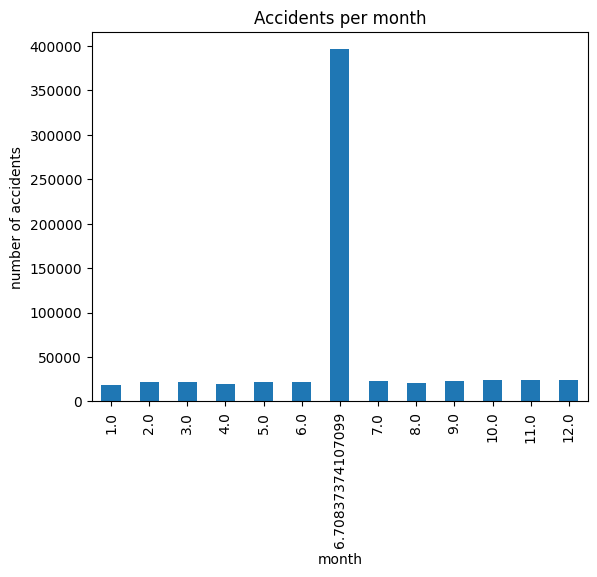

<Axes: xlabel='dayofweek'>

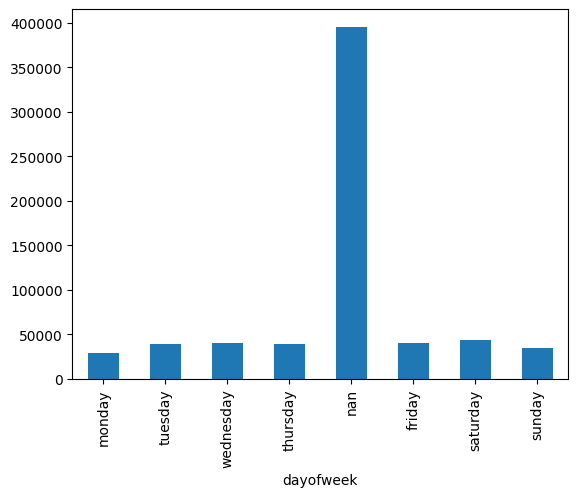

In [26]:
accidents_per_year=acci['year'].value_counts().sort_index()
accidents_per_month=acci['month'].value_counts().sort_index()
accidents_per_month.plot(kind='bar')
plt.title('Accidents per month')
plt.xlabel('month')
plt.ylabel('number of accidents')
plt.show()
month_names={
    0:'january',
    1:'febraury',
    2:'march',
    3:'april',
    4:'may',
    5:'june',
    7:'july',
    8:'august',
    9:'september',
    10:'october',
    11:'november',
    12:'december',
}
accidents_per_month.index=accidents_per_month.index.map(month_names)
accidents_per_day=acci['dayofweek'].value_counts().sort_index()
day_names={
    0:'monday',
    1:'tuesday',
    2:'wednesday',
    3:'thursday',
    4:'friday',
    5:'saturday',
    6:'sunday',
}
accidents_per_day.index=accidents_per_day.index.map(day_names)
accidents_per_day.plot(kind='bar')


<h1>GEOSPATIAL ANALYSIS</h1>

<h1>using FOLIUM library or leaflet js</h1>
<hr>


In [29]:
acci['District Area'].unique()


array(['Kensington and Chelsea', 'Westminster', 'Richmond upon Thames',
       'Hammersmith and Fulham', 'Hounslow', 'Tower Hamlets',
       'City of London', 'Southwark', 'Camden', 'Hackney', 'Islington',
       'Barnet', 'Brent', 'Haringey', 'Merton', 'Ealing', 'Enfield',
       'Greenwich', 'Newham', 'London Airport (Heathrow)', 'Hillingdon',
       'Waltham Forest', 'Redbridge', 'Barking and Dagenham', 'Bromley',
       'Havering', 'Croydon', 'Lambeth', 'Wandsworth', 'Sutton', 'Bexley',
       'Lewisham', 'Harrow', 'Kingston upon Thames', 'Barrow-in-Furness',
       'South Lakeland', 'Carlisle', 'Eden', 'Allerdale', 'Copeland',
       'Fylde', 'Blackpool', 'Wyre', 'Lancaster', 'Chorley',
       'West Lancashire', 'South Ribble', 'Preston',
       'Blackburn with Darwen', 'Hyndburn', 'Ribble Valley', 'Burnley',
       'Pendle', 'Rossendale', 'Wirral', 'Liverpool', 'Sefton',
       'Knowsley', 'St. Helens', 'Manchester', 'Salford', 'Tameside',
       'Stockport', 'Bolton', 'Wigan', '

In [30]:
# w_df['Latitude']=acci[acci['Latitude']=='Westminster'].fillna(acci[acci['Latitude']=='Westminster'].mode()[0])
# w_df['Longitude']=acci[acci['Longitude']=='Westminster'].fillna(acci[acci['Longitude']=='Westminster'].mode()[0])
london_df= d

KeyError: 0

In [ ]:
import folium
from folium.plugins import HeatMap

locations= list(zip(w_df['Latitude'].mean(),w_df['Longitude']))
m=folium.Map(locations= list[w_df['Latitude'].mean(),w_df['Longitude'].mean()], zoom_start=10)

HeatMap(locations).add_to(m)
m.save('accident_heatmap.html')
m
